Imports

In [ ]:
# imports
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Cleaning Data

In [ ]:
# read csv file
df = pd.read_csv('main.csv', on_bad_lines='skip')

In [ ]:
# convert 'High' and 'Low' columns to float format
df['High'] = df['High'].astype(str)
df['Low'] = df['Low'].astype(str)
def str_to_float(x):
    parts = x.split('.')
    if len(parts) > 1:
        return float(''.join(parts[:-1]) + '.' + parts[-1])
    else:
        return float(x)
df['High'] = df['High'].apply(str_to_float)
df['Low'] = df['Low'].apply(str_to_float)

# convert 'Number of trades' column to float format
def int_to_float(x):
  return float(x)

df['Number of trades'] = df['Number of trades'].apply(int_to_float)

# convert 'Open Time' and 'Close Time' columns to datetime format
def convert_timestamp_to_datetime(timestamp):
    if isinstance(timestamp, pd.Timestamp):
        return timestamp
    elif pd.isna(timestamp):
        return pd.NaT
    else:
        timestamp_sec = timestamp / 1000
        return datetime.utcfromtimestamp(timestamp_sec)

df['Open Time'] = df['Open Time'].apply(convert_timestamp_to_datetime)
df['Close Time'] = df['Close Time'].apply(convert_timestamp_to_datetime)

print(df.dtypes)

Open Time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close Time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                       float64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
dtype: object


Statistical Tests

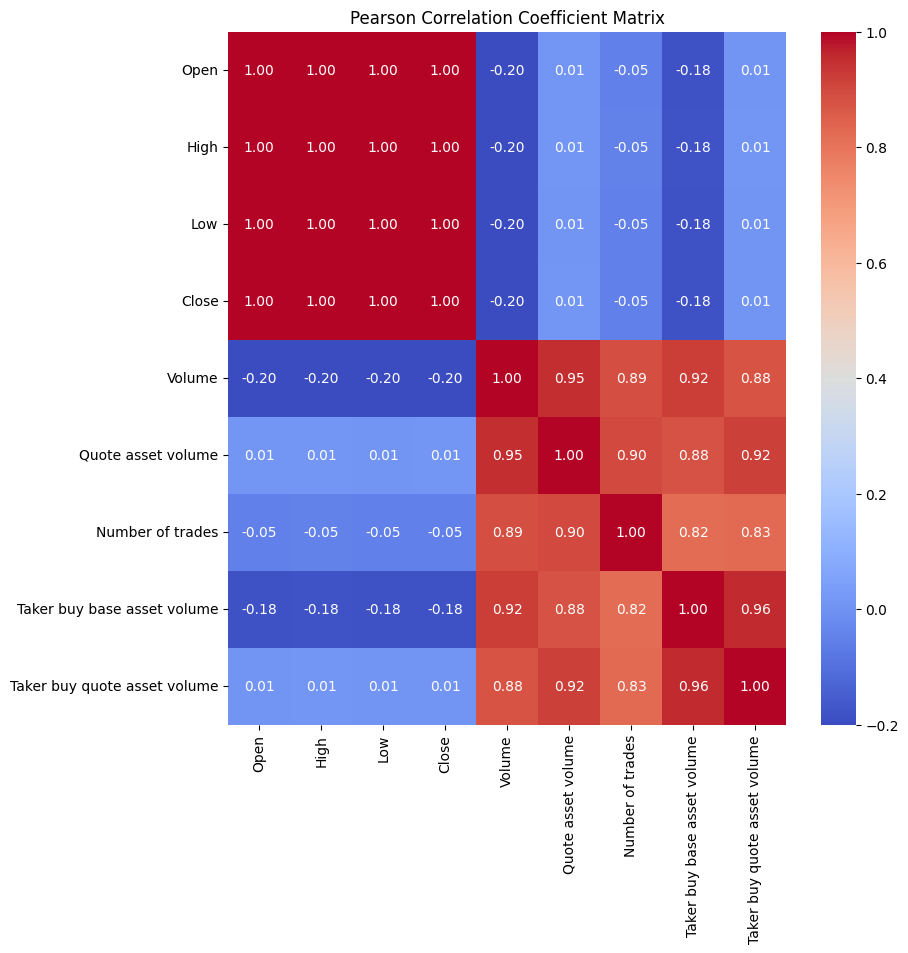

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

Conclusions drawn from pearson correlation coeffecient:



*   Taker Buy Base Asset Volume & Taker Buy Quote Asset Volume has a correlation coefficient value of 0.96. This indicates a very strong positive correlation between the volume of the base asset that takers are buying and the volume of the quote asset that takers are buying. This is significant as it shows that when takers are actively buying one asset, they are also actively buying the other, which might indicate a relationship between the trading of these two assets, such as paired trading in a cryptocurrency exchange where one asset is typically traded for another.
*   Volume & Taker Buy Base Asset Volume has a correlation coefficient value of 0.92. This indicates a very strong positive correlation here between trading volume and the volume of the asset that takers are buying. A high correlation suggests that when overall trading volume is high, there is a lot of buying activity from takers. This could be significant for identifying market trends, such as bullish behavior if the taker buy volume significantly increases with overall volume.
*   Volume & Number of Trades has a correlation coefficient value of 0.89. This indicates a very strong positive correlation between the two variables and tells us that as the trading volume increases, the number of trades tends to increase as well, and vice versa. This is significant because it implies that higher volumes of asset trading are associated with more individual transactions, which could indicate more active trading periods or high interest in the asset.



In [ ]:
from scipy.stats import chi2_contingency

df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Hour'] = df['Open Time'].dt.hour
df['Price Direction'] = np.where(df['Close'] > df['Open'], 'Up', 'Down')
contingency_table = pd.crosstab(df['Hour'], df['Price Direction'])
chi2_result = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2_result[0]}")
print(f"p-value: {chi2_result[1]}")

Chi-Square statistic: 23.685643869325276
p-value: 0.42138269388482635


<Figure size 1200x800 with 0 Axes>

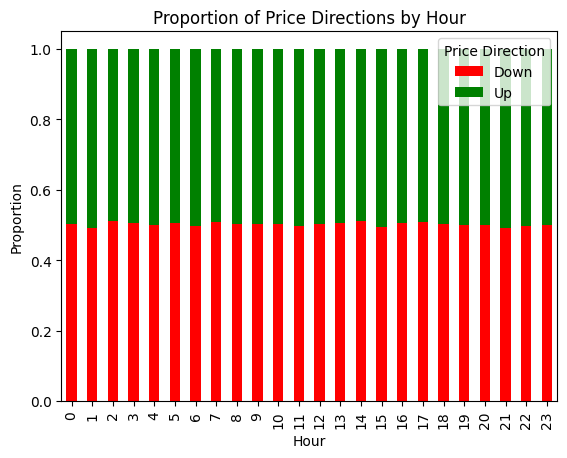

In [ ]:
plt.figure(figsize=(12, 8))

proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('Proportion of Price Directions by Hour')
plt.xlabel('Hour')
plt.ylabel('Proportion')
plt.legend(title='Price Direction', labels=['Down', 'Up'])

plt.show()

Since the p-value (0.42) is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis (H0). This means that we cannot conclude that there is a significant relationship between the time of day (hour) and the price direction (up or down) in the dataset.

In other words, the variations in price direction across different hours do not appear to be statistically significant, and any observed differences could be due to other features or random chance.








Index(['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Hour', 'Price Direction'],
      dtype='object')


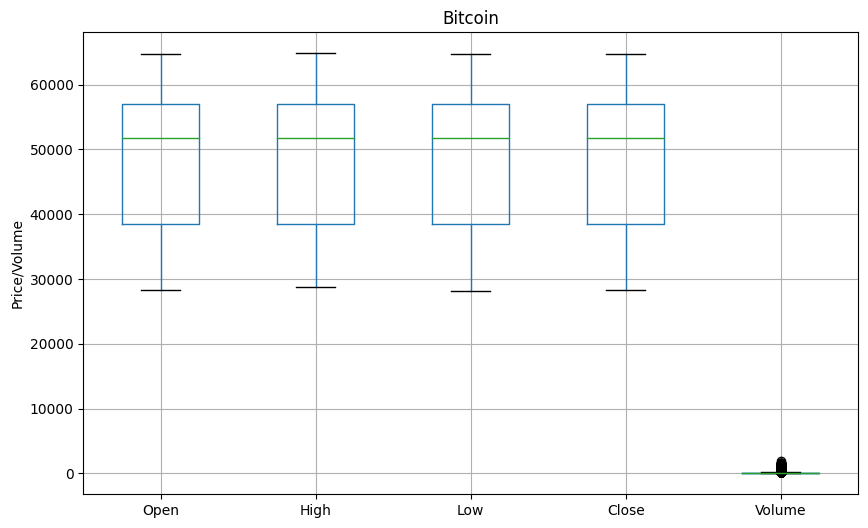

In [ ]:
features = df.columns
print(features)
plt.figure(figsize=(10, 6))
df.boxplot(column=['Open', 'High', 'Low', 'Close', 'Volume'])
plt.title('Bitcoin')
plt.ylabel('Price/Volume')
plt.show()

Conclusions drawn from box and whisker plot:

- By comparing the medians (middle line in the box) of the different categories, you can get a sense of the overall trend. For example, if the Close median is consistently higher than the Open median, it suggests an upward trend in prices over time.

- The length of the boxes and whiskers can indicate the volatility of the prices. Longer whiskers and taller boxes suggest greater price volatility, while shorter whiskers and boxes suggest more stable prices.

- Points beyond the whiskers are considered outliers and may indicate significant price movements or errors in the data.

- The boxplot for volume shows the range and distribution of trading volumes. Higher volumes may indicate increased market activity or interest in the asset.

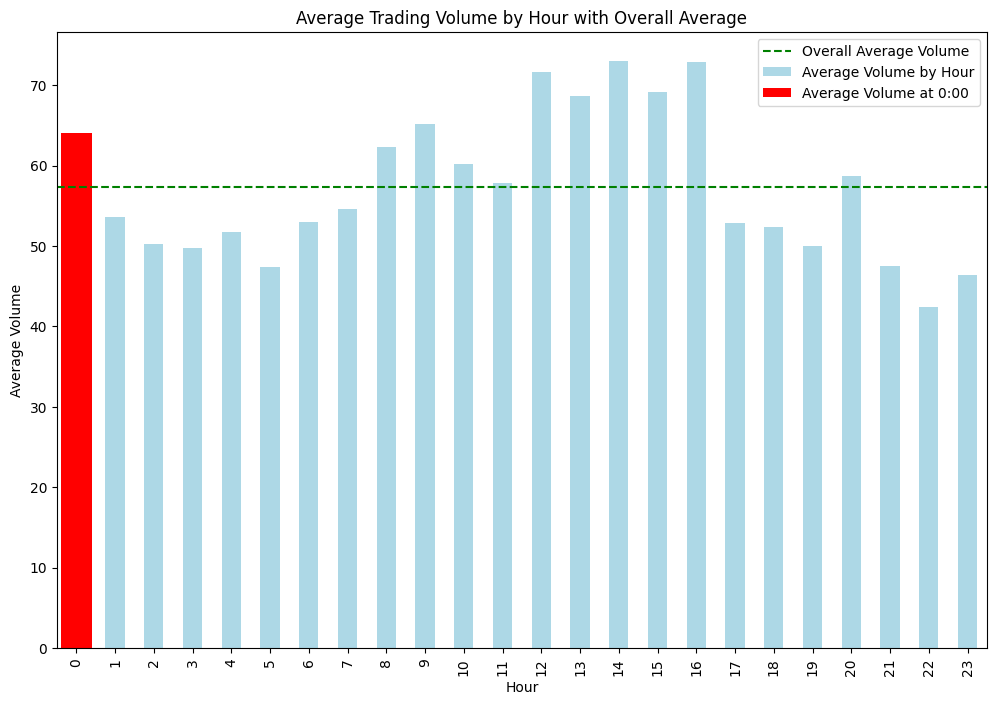

In [ ]:
average_volume_by_hour = df.groupby('Hour')['Volume'].mean()

plt.figure(figsize=(12, 8))
average_volume_by_hour.plot(kind='bar', color='lightblue', label='Average Volume by Hour')

plt.bar(0, average_volume_by_hour[0], color='red', label='Average Volume at 0:00')

plt.axhline(y=overall_mean_volume, color='green', linestyle='--', label='Overall Average Volume')

plt.xlabel('Hour')
plt.ylabel('Average Volume')
plt.title('Average Trading Volume by Hour with Overall Average')
plt.legend()

plt.show()

Null hypothesis (H0): The average volume at 0:00 is equal to the overall average volume.
Alternative hypothesis (H1): The average volume at 0:00 is not equal to the overall average volume.

The result of the one-sample t-test shows a test statistic of approximately 9.27 and a very small p-value (2.33e-20). Since the p-value is much less than 0.05, we can reject the null hypothesis (H0).
This means that there is a significant difference between the average volume at 0:00 and the overall average volume. In other words, the trading volume at 0:00 is significantly different from the average trading volume across all hours.

In [ ]:
from scipy.stats import f_oneway

df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Hour'] = df['Open Time'].dt.hour
grouped_df = df.groupby('Hour')['Close'].apply(list)
anova_result = f_oneway(*grouped_df)

print(anova_result)

F_onewayResult(statistic=0.7782289735432184, pvalue=0.7629222848164195)


In [ ]:
from scipy.stats import chi2_contingency

df['Price Direction'] = np.where(df['Close'] > df['Open'], 'Up', 'Down')

contingency_table = pd.crosstab(df['Hour'], df['Price Direction'])

chi2_result = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2_result[0]}")
print(f"p-value: {chi2_result[1]}")

Chi-Square statistic: 23.685643869325276
p-value: 0.42138269388482635


<Figure size 1200x800 with 0 Axes>

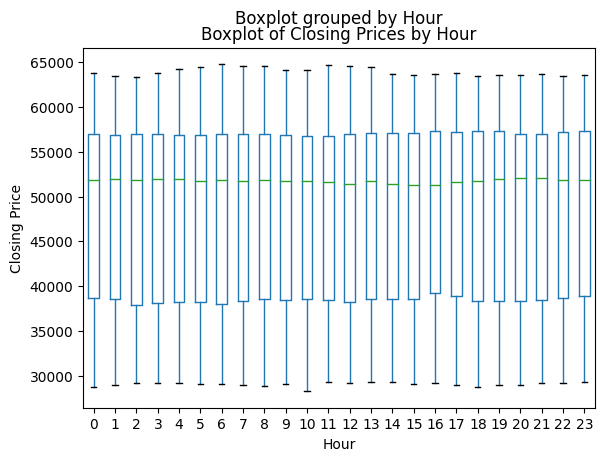

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Close', by='Hour', grid=False)
plt.title('Boxplot of Closing Prices by Hour')
plt.xlabel('Hour')
plt.ylabel('Closing Price')
plt.show()

Null hypothesis (H0): There is no significant difference in the average closing prices across different time periods.

Alternative hypothesis (H1): There is a significant difference in the average closing prices across different time periods.

The ANOVA test result gives us an F-statistic of approximately 0.78 and a p-value of approximately 0.76.

Since the p-value is greater than the common significance level of 0.05, we fail to reject the null hypothesis. This means that there is no significant difference in the average closing prices across different time periods (hours) in the dataset.

In other words, based on this analysis, the time of day does not seem to have a significant impact on the average closing prices.

Conclusion:

From our findings, we were able to conclude that there is a strong correlation between different volume measures which indicates that certain trading activities are closely linked, which may be due to response to trending market news or events. We also found that the time of day has no significant effect on the price direction or closing prices of the currency. This suggests to us that the market mainly operates uniformly across all hours throughout the day. A conclusion we found was that there is a significant difference between the trading volume at the beginning of the day and the average trading volume across all hours for any given day. Together, these three conclusions tell us that the trends in Bitcoin pricing are characterized by its responsiveness to global trends, uniformity in price movements across the clock, and varying volume patterns at certain hours throughout the day.

As of right now, we are only able to tell on a day-to-day basis that there is a significant change in Bitcoin price. However, since we are looking at the broader picture here and trying to analyze whether or not Bitcoin is a profitable investment over time, we plan to adopt another analysis technique to draw insights from market information.

For our next submission, we plan to use a time series analysis. A big reason for choosing this primary analysis technique is because it largely relies on data from the past which is perfect for our dataset that gives past market information. Furthermore, in our conclusion, we observed that there was a significant correlation between price and time of day, but we think there should be a greater correlation between price over a prolonged period of time. Seeing as we want to predict future market trends to decide whether or not Bitcoin would be profitable, a predictive analysis like time series would be very useful.
